Fitness company business case




Problem statement-

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the data

In [2]:
df = pd.read_csv("aerofit.csv")


Exploratory data analysis (EDA)

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape

(180, 9)

In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [4]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

There are three unique product 'KP281', 'KP481', 'KP781' where KP281 is entry-level treadmill, KP481 is for mid-level runners and KP781 treadmill has advanced features.

Non-Graphical Analysis


In [ ]:
df.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
KP481    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
KP281    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
KP781    48   Male    18         Partnered      4      5        95508   180      1
Length: 1

In [ ]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Visual analysis

Univariate

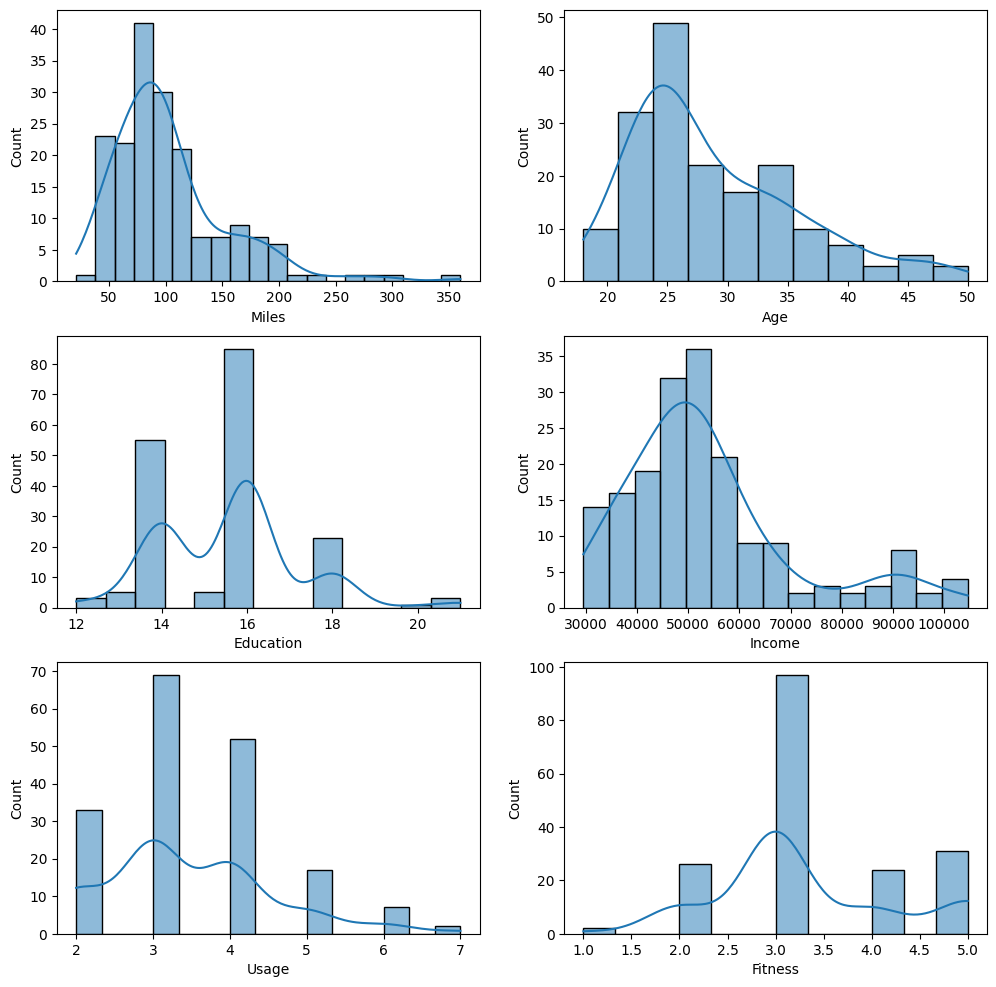

In [5]:
fig, axis = plt.subplots(nrows=3, ncols=2,figsize=(12,12))

sns.histplot(data=df,x="Miles", kde=True,ax=axis[0,0])
sns.histplot(data=df,x="Age", kde=True,ax=axis[0,1])
sns.histplot(data=df,x="Education", kde=True,ax=axis[1,0])
sns.histplot(data=df,x="Income", kde=True,ax=axis[1,1])
sns.histplot(data=df,x="Usage", kde=True,ax=axis[2,0])
sns.histplot(data=df,x="Fitness", kde=True,ax=axis[2,1])
plt.show()


The products are predominantly purchased by individuals in the age group of 24 to 32.

The products are primarily being purchased by individuals with a total of 16 years of education.

Most people use the product 3 days per week.

Based on the data, the average fitness rating of individuals is 3.


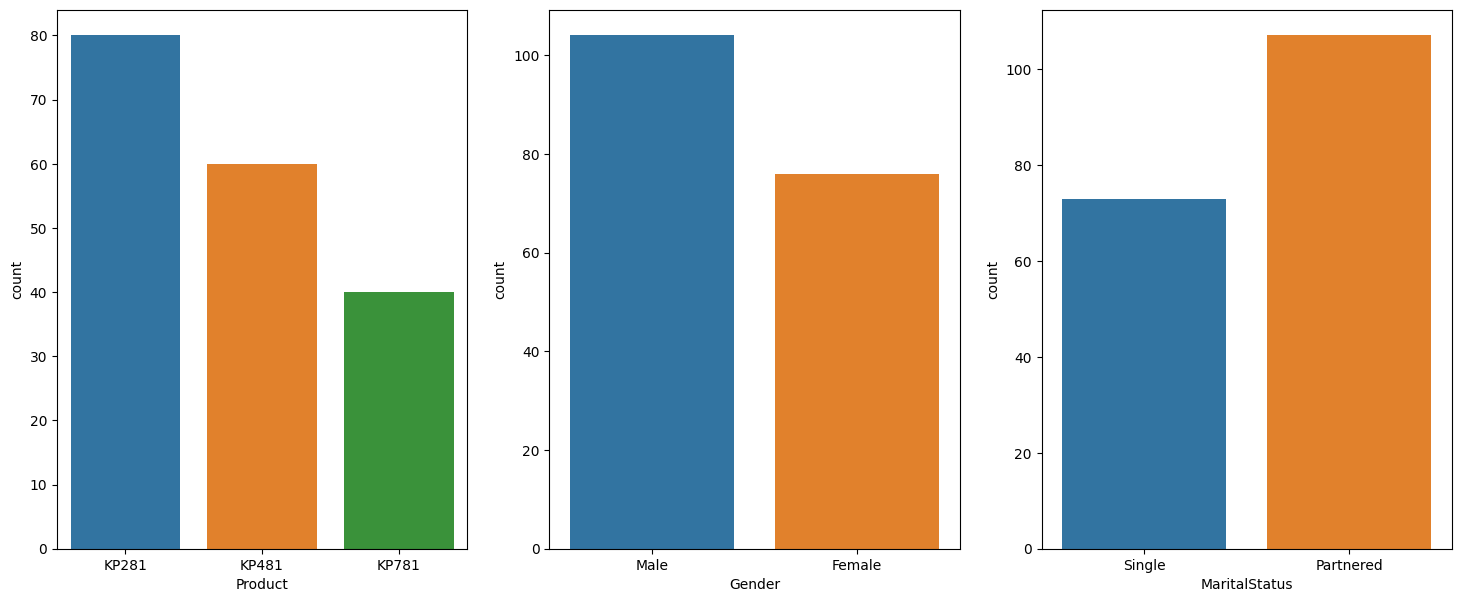

In [6]:
fig, axis = plt.subplots(nrows=1, ncols=3,figsize=(18,7))

sns.countplot(data=df,x="Product",ax=axis[0])
sns.countplot(data=df,x="Gender", ax=axis[1])
sns.countplot(data=df,x="MaritalStatus",ax=axis[2])
plt.show()

The most purchased product is KP281.

There are a greater number of males purchasing the product compared to females.

The data contains a higher number of partnered individuals.

Outlier detection using boxplot

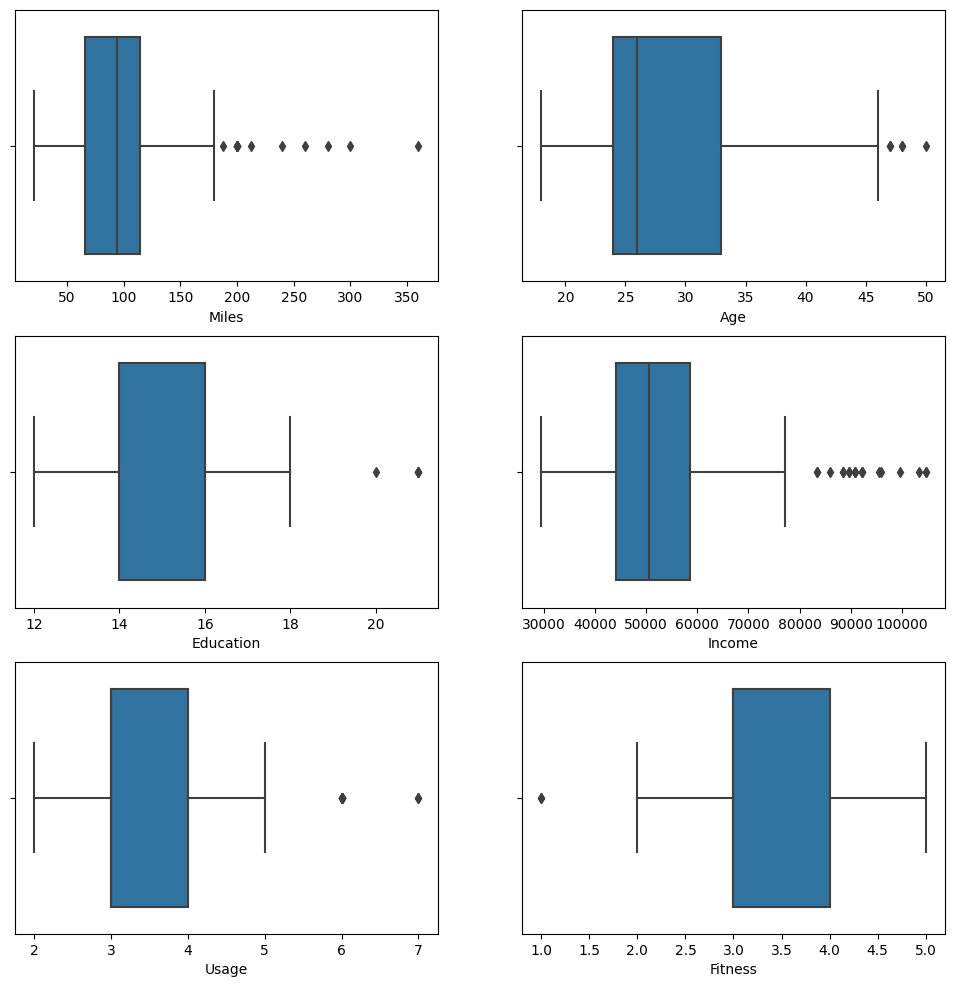

In [7]:

fig, axis = plt.subplots(nrows=3, ncols=2,figsize=(12,12))

sns.boxplot(data=df,x="Miles",ax=axis[0,0])
sns.boxplot(data=df,x="Age",hue="Product", ax=axis[0,1])
sns.boxplot(data=df,x="Education",ax=axis[1,0])
sns.boxplot(data=df,x="Income",ax=axis[1,1])
sns.boxplot(data=df,x="Usage",ax=axis[2,0])
sns.boxplot(data=df,x="Fitness",ax=axis[2,1])
plt.show()

The data shows that income and miles have the highest number of outliers, while the rest of the data has minimal outliers.

Bivariate

<Axes: xlabel='Product', ylabel='Education'>

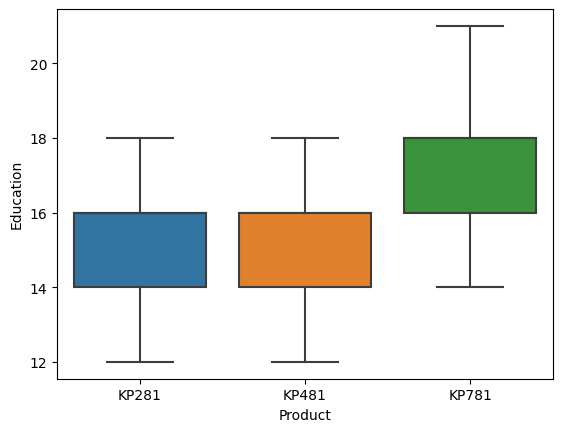

In [8]:
sns.boxplot(x=df["Product"], y=df["Education"])


Individuals with an education level exceeding 16 years are more inclined to purchase KP781.

<Axes: xlabel='Product', ylabel='Miles'>

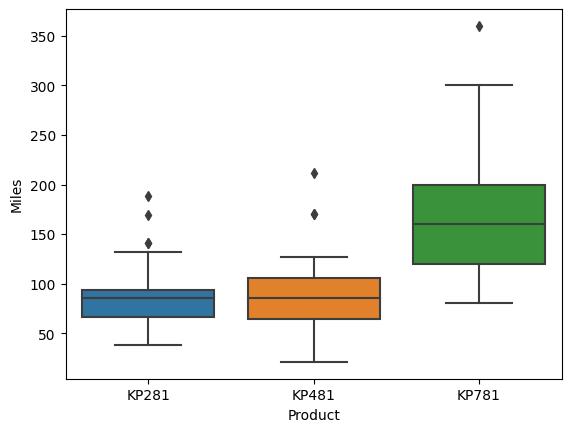

In [9]:
sns.boxplot(x=df["Product"], y=df["Miles"])

Individuals who run or walk more than 120 miles per week prefer KP781.

<Axes: xlabel='Product', ylabel='Fitness'>

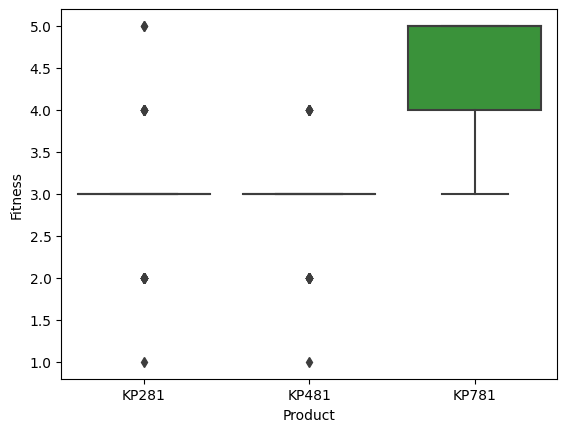

In [10]:
sns.boxplot(x=df["Product"], y=df["Fitness"])

People with a fitness rating more than 4 are using KP781.

<Axes: xlabel='Product', ylabel='Usage'>

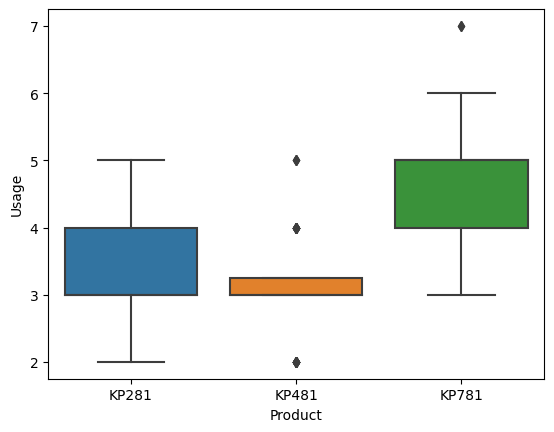

In [11]:
sns.boxplot(x=df["Product"], y=df["Usage"])

Individuals who use the product for more than 4 days a week are most likely to have KP781.

Multivariate

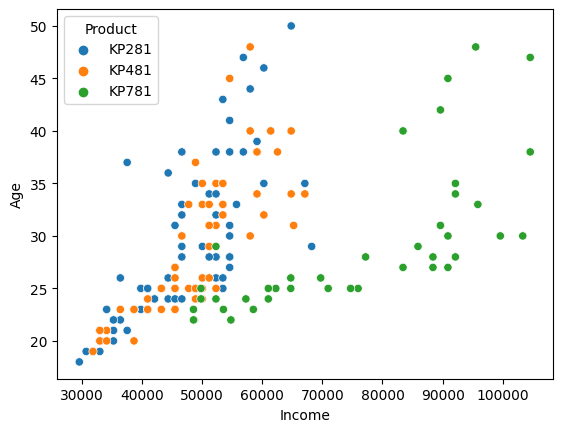

In [12]:
sns.scatterplot(x=df["Income"], y=df["Age"], hue=df["Product"])
plt.show()

The majority of the data falls within the 22 to 30 age group and the income range of 40000 to 55000.

<Axes: xlabel='Gender', ylabel='Income'>

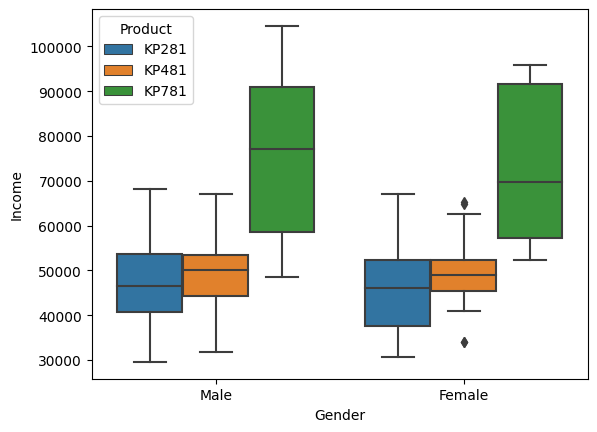

In [13]:
sns.boxplot(x = "Gender", y="Income", hue = "Product", data = df)



In both genders, individuals with an income of 70000 and above are more inclined to purchase KP781.

<Axes: xlabel='Miles', ylabel='Income'>

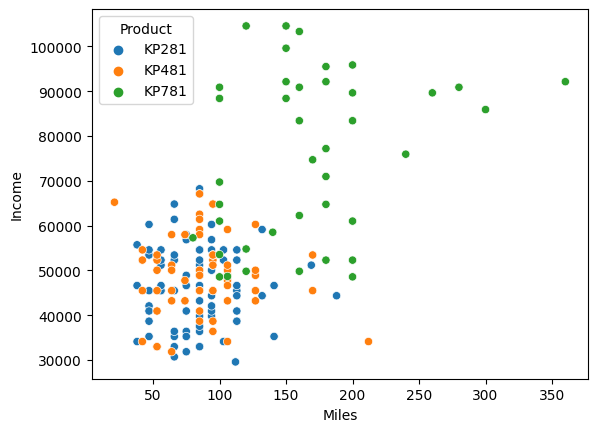

In [14]:
sns.scatterplot(x = "Miles" , y = "Income", hue = "Product", data = df)

People with higher incomes are more likely to purchase the KP781 treadmill, and they also tend to run more miles.

<Axes: xlabel='Usage', ylabel='Miles'>

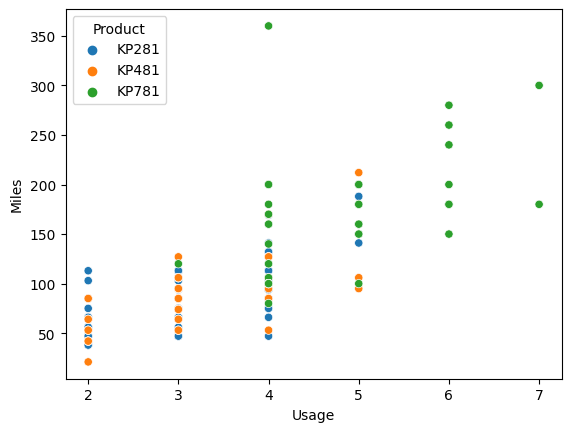

In [15]:
sns.scatterplot(x = "Usage" , y = "Miles", hue = "Product", data = df)

Individuals who engage in high-mileage running typically use the treadmill more frequently and show a preference for the KP781 model.

Pairplot

Heatmap and Co-relation

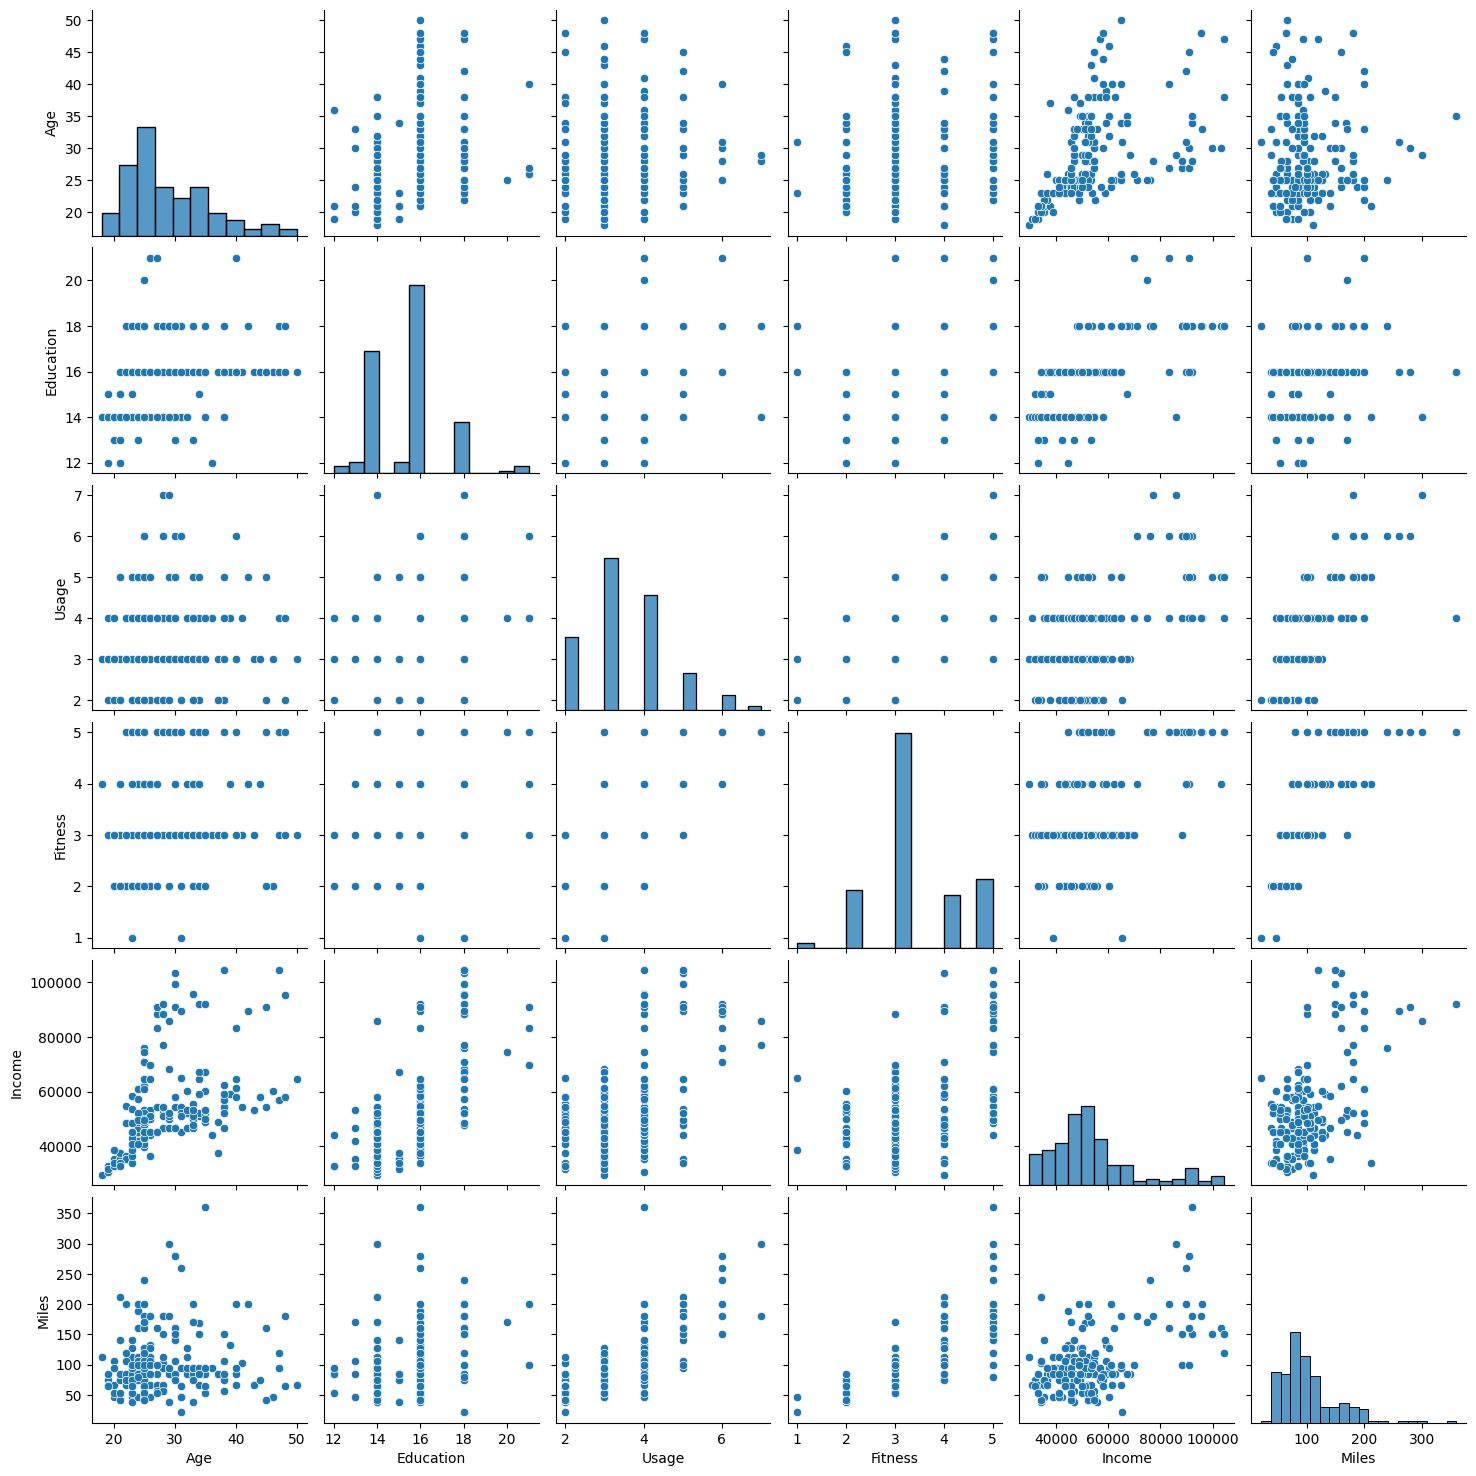

<Figure size 500x300 with 0 Axes>

In [16]:
sns.pairplot(data=df)
plt.figure(figsize=(5,3))
plt.show()

In [17]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

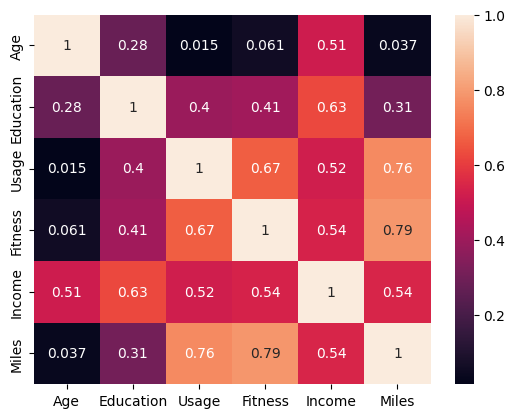

In [18]:
sns.heatmap(df.corr(), annot = True)

As you can see in the Heatmap There is highest corelation between:

Fitness and Miles (higher the miles more the fitness)

Usage and Miles (higher the miles more the usage)

Fitness and Usage (higher the usage more the fitness)

Income and Education (higher the Education more the Income)

Also we can see less corelation between:

Age and Usage

Age and Miles

Age and Fitness (As the age increase there is very less growth in Usage, miles and Fitness)


Two-way contigency table and heatmap

<Axes: xlabel='Usage', ylabel='Product'>

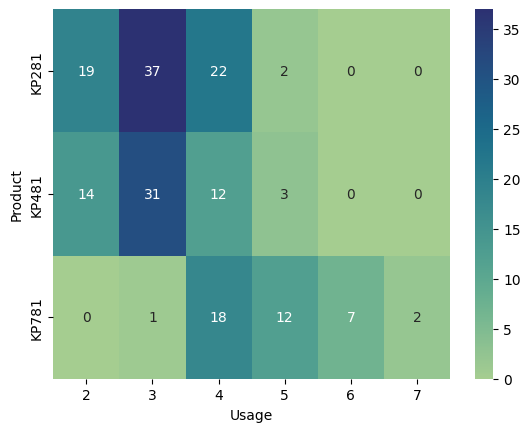

In [19]:
sns.heatmap(pd.crosstab(df['Product'],df['Usage'] ),annot=True, cmap="crest")

Conditional probability

In [20]:
pd.crosstab(df['Product'],df['Fitness'], margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


<Axes: xlabel='Fitness', ylabel='Product'>

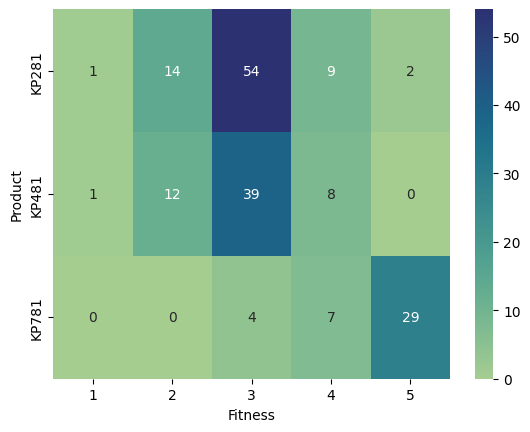

In [21]:
sns.heatmap(pd.crosstab(df['Product'],df['Fitness'] ),annot=True, cmap="crest")

Conditional probability: Out of 40 people using KP781 29 people claims to have highest fitness 5 (i.e. Probablity of fitness 5 given the product is KP781 is 29/40=0.725)

In [22]:
pd.crosstab(df['Product'],df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


Conditional probability: Out of 40 people using KP781 33 people are males (i.e. Probablity of males given the product is KP781 is 33/40=0.825)

In [23]:
pd.crosstab (index=df['Gender'],columns=df['Product'], margins=True,normalize='index')*100

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


The probability of KP281 being bought given that it is a Male customer--> 38.46%

Marginal probability

In [24]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [25]:
df['Gender'].value_counts(normalize = True)*100

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

57.78% of the people are male users

42.22% of the prople are female users

In [26]:
df['Product'].value_counts(normalize = True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

44.44% of people uses KP281

33.33% of people uses KP481

22.22% of people uses KP781

In [27]:
df['Usage'].value_counts(normalize = True)*100

3    38.333333
4    28.888889
2    18.333333
5     9.444444
6     3.888889
7     1.111111
Name: Usage, dtype: float64

38.33% of people prefer to use the treadmill 3 days a week, which represents the majority.

Joint probability

In [28]:
pd.crosstab(index = df['Gender'], columns = df['Product'], normalize = True, margins = True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


The probability of a female purchasing KP781 is 3.8%

Business Insights



*   There are three unique product 'KP281', 'KP481', 'KP781' where KP281 is
entry-level treadmill, KP481 is for mid-level runners and KP781 treadmill has advanced features.

*   The products are predominantly purchased by individuals in the age group of 24 to 32.

*   The products are primarily being purchased by individuals with a total of 16 years of education.

*   Most people use the product 3 days per week.

*   Based on the data, the average fitness rating of individuals is 3.

*   The most purchased product is KP281 (44.44% uses KP281).

*   There are a greater number of males purchasing the product compared to females (57.78% of the people are male user).

*   The data contains a higher number of partnered individuals (59.44% of the people are Partnered).

*   Individuals with an education level exceeding 16 years are more inclined to purchase KP781.

*   Individuals who run or walk more than 120 miles per week prefer KP781.

*   People with a fitness rating more than 4 are using KP781.

*   The majority of the data falls within the 22 to 30 age group and the income range of 40000 to 55000.

*   In both genders, individuals with an income of 70000 and above are more inclined to purchase KP781.

*   People with higher incomes are more likely to purchase the KP781 treadmill, and they also tend to run more miles.

*   Individuals who engage in high-mileage running typically use the treadmill more frequently and show a preference for the KP781 model.











Business Recommendations


*   Aerofit can target age group of 24 to 32 which are more enthusiastic buyers of fitness product.

* According to the data Partnered people are more likely to buy this product, so company can run a campaign to attract more single people.

* Aerofit can explore opportunities to sell or collaborate with fitness watch providers that collect data and target individuals who walk or run more than 120 miles per week.

* Aerofit can focus its marketing efforts on individuals with an income exceeding 55000, as they are more likely to purchase the premium product, KP781.

* The data also indicates that individuals with more than 16 years of education are inclined to purchase KP781.

* Aerofit can direct its marketing efforts towards individuals who engage in exercise on at least 4 days per week, as they are more inclined to purchase advanced feature product, KP781.

* Customers who currently use KP481 and have an income exceeding 50000 can be suggested to consider upgrading to KP781.

* As partnered individuals are more inclined to purchase this product, Aerofit can also offer fitness products designed for couples or families, such as fitness watches, air purifiers, sleep monitors, and more.


* The probability of females purchasing KP781 is 3.8%. Therefore, we may either decide not to actively target females with KP781 recommendations, or we can implement marketing strategies aimed at increasing their consideration of KP781 as a product choice.

